In [3]:
from google.colab import files #Projeye Ait Veri Seti Yüklenmiştir.
uploaded = files.upload()


Saving customer_experience_data.csv to customer_experience_data.csv


In [1]:
# Gerekli Kütüphane ve Fonksiyonlar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#Veri Setinin İlk 5 Satırı Görüntülenmiştir.
df= pd.read_csv("customer_experience_data.csv")
df.head()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [8]:
#Veri seti içerisindeki satır ve sütun adet kontrolü yapıldı.
#Her Bir Sütunun Veri Türü Listelendi.
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
check_df(df)


##################### Shape #####################
(1000, 14)
##################### Types #####################
Customer_ID                   int64
Age                           int64
Gender                       object
Location                     object
Num_Interactions              int64
Feedback_Score                int64
Products_Purchased            int64
Products_Viewed               int64
Time_Spent_on_Site          float64
Satisfaction_Score            int64
Retention_Status             object
Gender_Encoded                int64
Location_Encoded              int64
Retention_Status_Encoded      int64
dtype: object


In [9]:
# Veri setindeki istatistiksel özetler incelendi.
df.describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


In [19]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Tüm Sayısal Değişkenler İçin Aykırı Değer Sayısı Analiz Edildi.
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} aykırı değer")


Customer_ID: 0 aykırı değer
Age: 0 aykırı değer
Num_Interactions: 0 aykırı değer
Feedback_Score: 0 aykırı değer
Products_Purchased: 0 aykırı değer
Products_Viewed: 0 aykırı değer
Time_Spent_on_Site: 0 aykırı değer
Satisfaction_Score: 0 aykırı değer
Gender_Encoded: 0 aykırı değer
Location_Encoded: 0 aykırı değer
Retention_Status_Encoded: 0 aykırı değer


In [10]:
#Veri Setinde Eksik Değer Sayısı Analiz Edilmiştir.
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Location,0
Num_Interactions,0
Feedback_Score,0
Products_Purchased,0
Products_Viewed,0
Time_Spent_on_Site,0
Satisfaction_Score,0


In [11]:
#Hedef Değişkenin Dağılımı Analiz Edilmiştir.
df['Retention_Status'].value_counts()

,count
Retention_Status,
Retained,694
Churned,306


In [12]:
# Kategorik, Sayısal ve Sayısal Gözüküp Kategorik Veri Barındıran Sütunlar Ayrıştırılmıştır.
cat_cols = df.select_dtypes(include='object').columns
num_cols = df[["Age","Num_Interactions","Products_Purchased","Products_Viewed","Time_Spent_on_Site"]]
num_but_cat = df[["Feedback_Score","Satisfaction_Score","Gender_Encoded","Location_Encoded","Retention_Status_Encoded"]]

In [13]:
#Kategorik Değişkenlerin Analizi Yapılmıştır.
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)

        Gender  Ratio
Gender               
Male       524   52.4
Female     476   47.6
##########################################
          Location  Ratio
Location                 
Urban          344   34.4
Suburban       344   34.4
Rural          312   31.2
##########################################
                  Retention_Status  Ratio
Retention_Status                         
Retained                       694   69.4
Churned                        306   30.6
##########################################


count    1000.00000
mean       43.81900
std        14.99103
min        18.00000
5%         20.00000
30%        34.00000
50%        44.00000
70%        53.30000
90%        65.00000
95%        67.00000
max        69.00000
Name: Age, dtype: float64


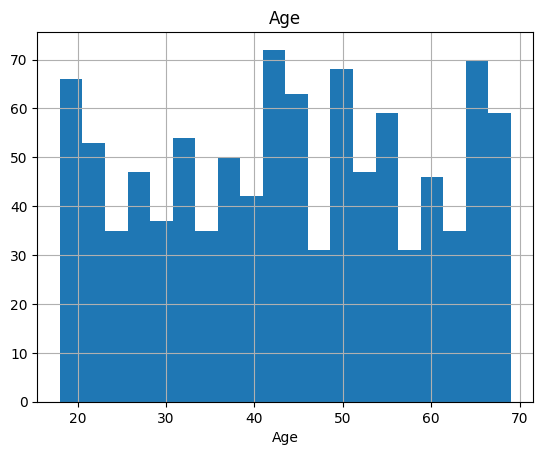

count    1000.000000
mean        7.545000
std         4.016978
min         1.000000
5%          1.000000
30%         5.000000
50%         8.000000
70%        10.000000
90%        13.000000
95%        14.000000
max        14.000000
Name: Num_Interactions, dtype: float64


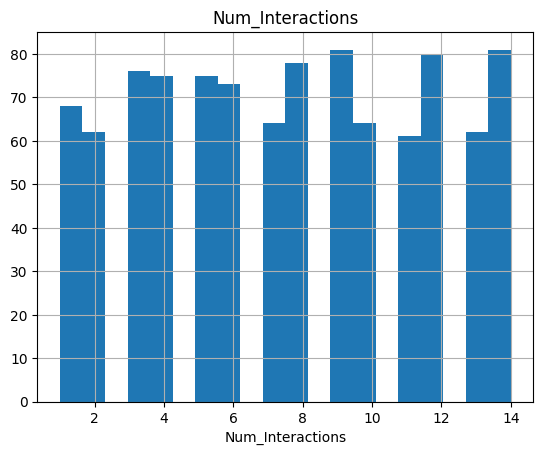

count    1000.000000
mean       10.417000
std         5.345623
min         1.000000
5%          2.000000
30%         7.000000
50%        11.000000
70%        14.000000
90%        17.000000
95%        18.000000
max        19.000000
Name: Products_Purchased, dtype: float64


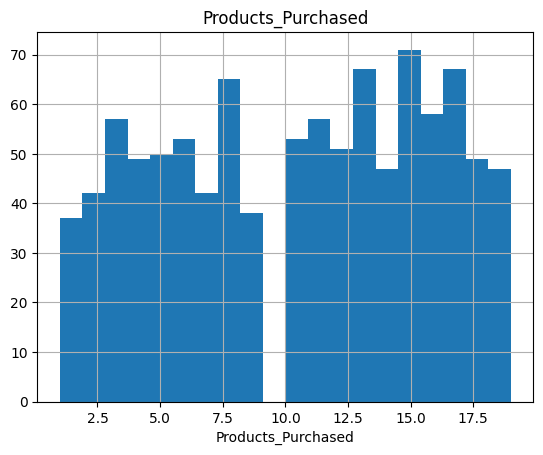

count    1000.000000
mean       27.370000
std        12.939572
min         5.000000
5%          7.000000
30%        19.000000
50%        27.500000
70%        36.000000
90%        46.000000
95%        48.000000
max        49.000000
Name: Products_Viewed, dtype: float64


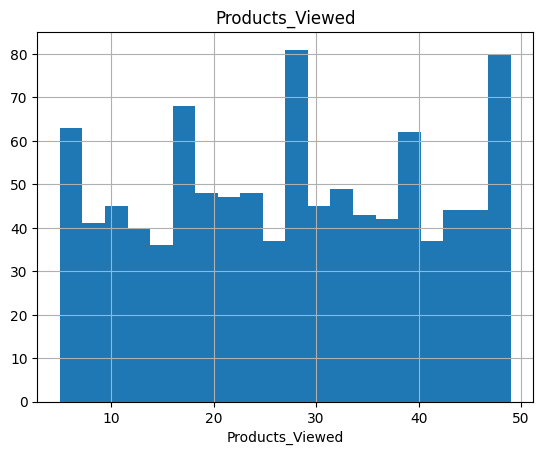

count    1000.000000
mean       32.274399
std        15.734978
min         5.114208
5%          7.899187
30%        21.240354
50%        32.455598
70%        43.607544
90%        53.277050
95%        56.834298
max        59.947722
Name: Time_Spent_on_Site, dtype: float64


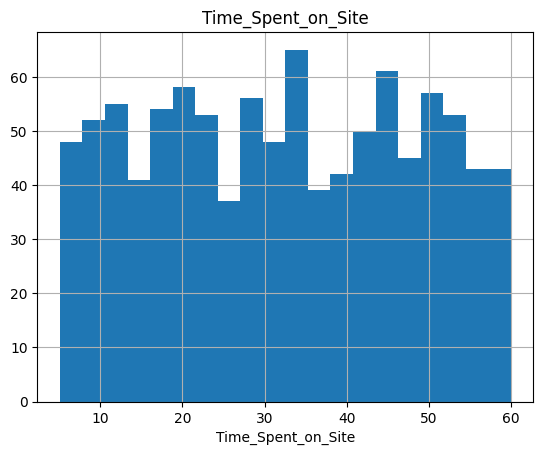

In [14]:
# Sayılsal Değerlerin Analizi Yapılmıştır.
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.30, 0.50, 0.70,  0.90, 0.95]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

In [15]:
# Kategorik Değişkenlerin Target Değişkenine Göre Analizi Yapılmıştır.

def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Retention_Status_Encoded", col)

Gender
        TARGET_MEAN  Count  Ratio
Gender                           
Female     0.684874    476   47.6
Male       0.702290    524   52.4


Location
          TARGET_MEAN  Count  Ratio
Location                           
Rural        0.711538    312   31.2
Suburban     0.729651    344   34.4
Urban        0.642442    344   34.4


Retention_Status
                  TARGET_MEAN  Count  Ratio
Retention_Status                           
Churned                   0.0    306   30.6
Retained                  1.0    694   69.4




In [47]:
# Sayısal Değişkenlerin Target Değişkenine Göre Analizi Yapılmıştır.
def target_summary_with_num(dataframe, target, numerical_col):
       print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Retention_Status_Encoded", col)

                                Age
Retention_Status_Encoded           
0                         43.647059
1                         43.894813


                          Num_Interactions
Retention_Status_Encoded                  
0                                 7.349673
1                                 7.631124


                          Products_Purchased
Retention_Status_Encoded                    
0                                  10.588235
1                                  10.341499


                          Products_Viewed
Retention_Status_Encoded                 
0                               27.800654
1                               27.180115


                          Time_Spent_on_Site
Retention_Status_Encoded                    
0                                  32.368384
1                                  32.232959




In [41]:
#Korelasyon Matrisi için listeler oluşturuldu.
num_cols = ['Age','Num_Interactions', 'Products_Purchased',
            'Products_Viewed', 'Time_Spent_on_Site']
num_cols_with_target = num_cols + ['Retention_Status_Encoded']


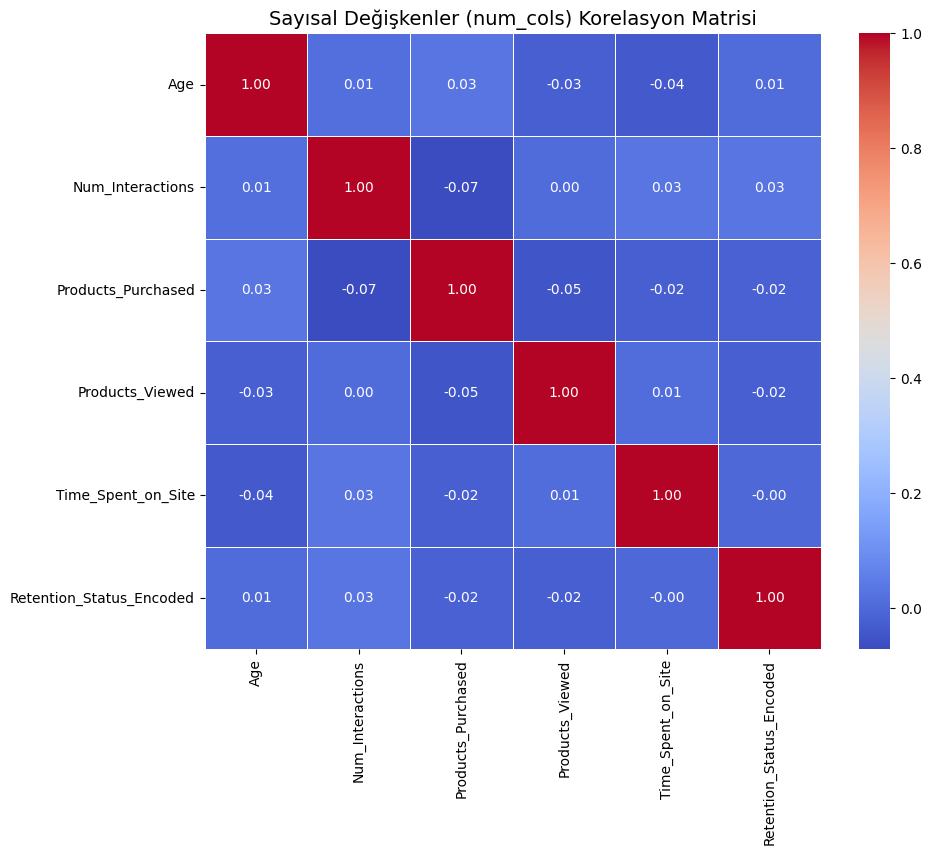

In [42]:
#Korelasyon Matrisi
corr_matrix = df[num_cols_with_target].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=.5)
plt.title("Sayısal Değişkenler (num_cols) Korelasyon Matrisi", fontsize=14)
plt.show()


In [39]:
#Korelasyon Matrisi Sonuçları
corr_matrix['Retention_Status_Encoded'].sort_values(ascending=False)

,Retention_Status_Encoded
Retention_Status_Encoded,1.000000
Num_Interactions,0.032304
Time_Spent_on_Site,-0.003968
Products_Purchased,-0.021281
Products_Viewed,-0.022111


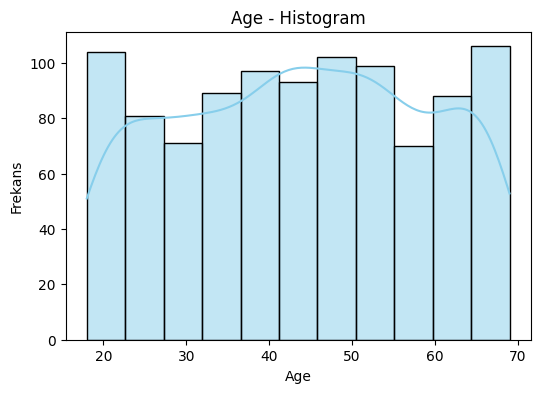

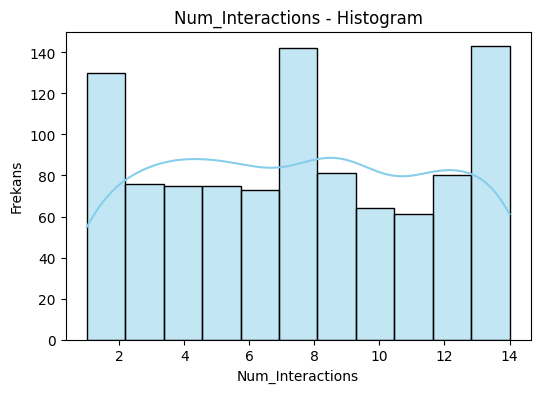

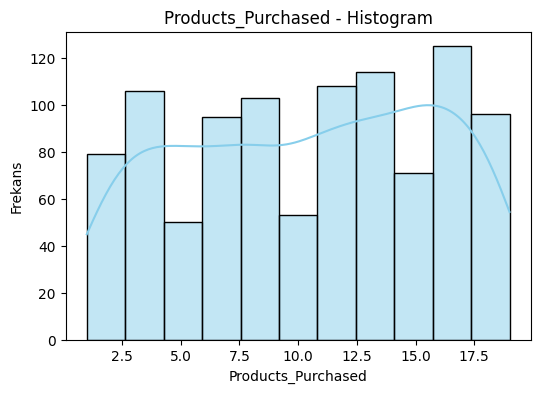

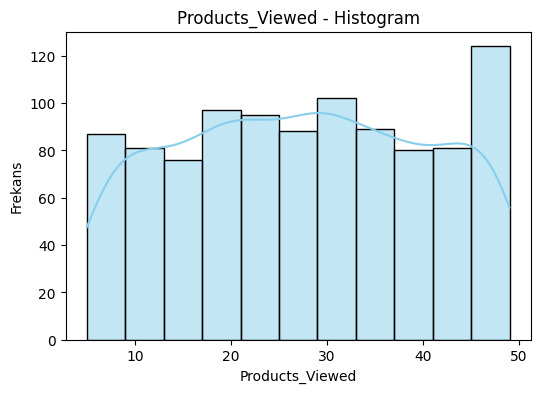

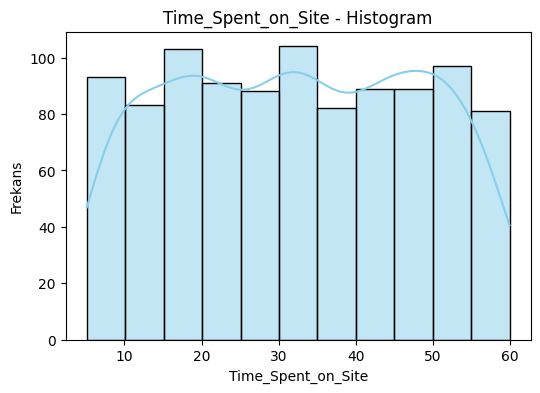

In [20]:
#Sayısal Değişkenlerin Dağılımları Görselleştirilmiştir.
#Her sütun için histogram grafiği çizilerek verinin dağılım özellikleri incelenmiştir:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"{col} - Histogram")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.show()


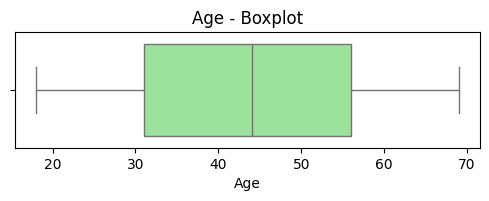

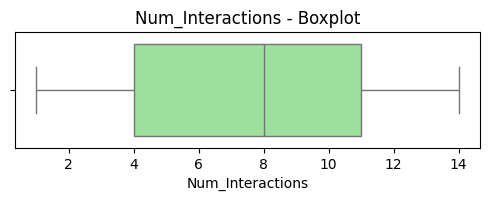

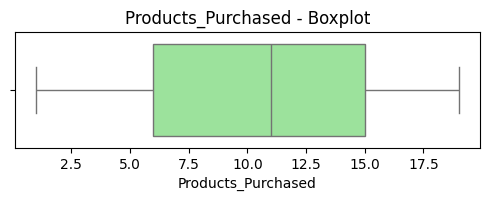

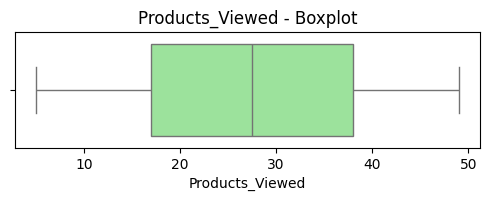

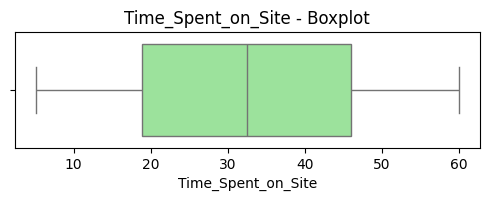

In [67]:
#Sayısal değişkenlerde dağılım aralıklarını daha iyi anlamak için kutu grafikler çizilmiştir.
for col in num_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"{col} - Boxplot")
    plt.show()


/tmp/ipython-input-69-2285515658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


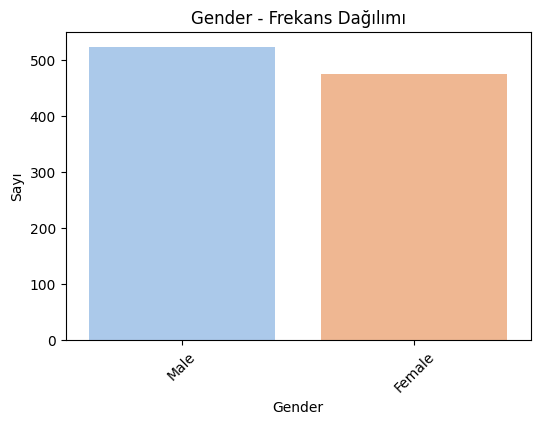

/tmp/ipython-input-69-2285515658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


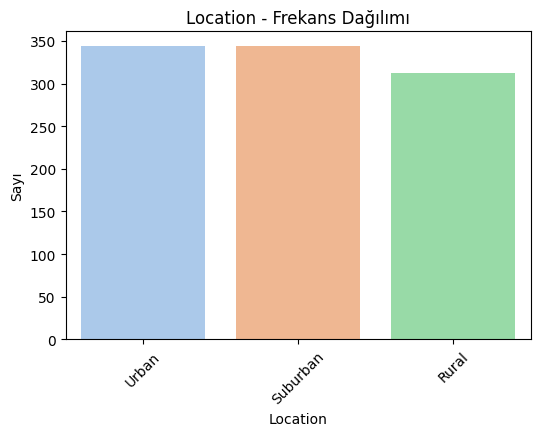

/tmp/ipython-input-69-2285515658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


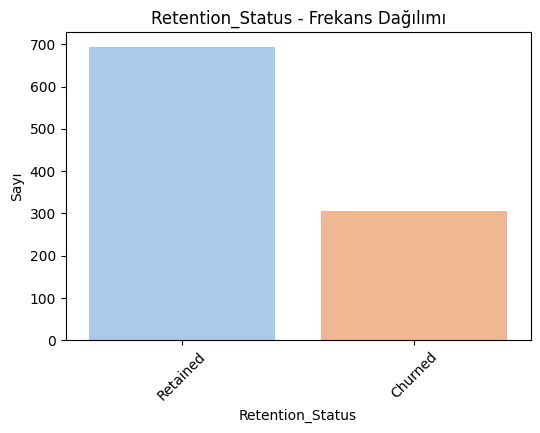

In [69]:
#Kategorik değişkenlerin her bir sınıfının veri içindeki sayısını görsel olarak incelemek amacıyla sayım grafikleri (countplot) çizilmiştir.

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f"{col} - Frekans Dağılımı")
    plt.xticks(rotation=45)
    plt.ylabel("Sayı")
    plt.show()


<ipython-input-24-1888667372>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Satisfaction_Score', data=df, palette="Set2")


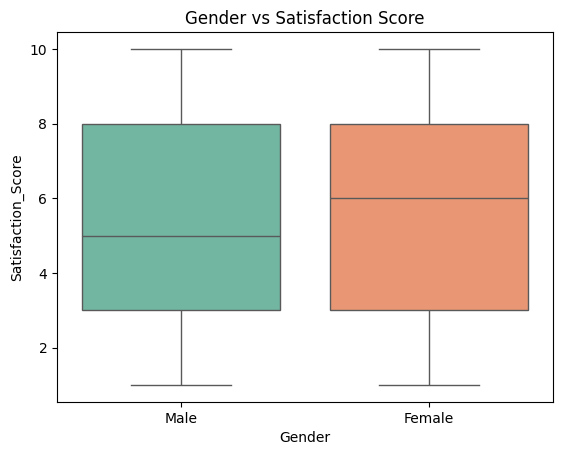

In [24]:
#Erkek ve Kadın Müşterilerin Memnuniyetleri Arasında ki Fark Görselleştirilmiştir.
sns.boxplot(x='Gender', y='Satisfaction_Score', data=df, palette="Set2")
plt.title("Gender vs Satisfaction Score")
plt.show()
